In [1]:
from keras.models import Model
from keras.layers import Input
from keras.applications.vgg19 import VGG19
import keras.backend as K

import numpy as np
from skimage import data, io
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
img_shape = (1080, 1920, 3)

In [3]:
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=img_shape)

W0920 00:32:26.361996 139841742993216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0920 00:32:26.381735 139841742993216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0920 00:32:26.385340 139841742993216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0920 00:32:26.417856 139841742993216 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:39

In [4]:
# model size
int(np.sum([np.prod(np.array([s if isinstance(s, int) else 1 for s in l.output_shape])) for l in vgg19.layers])) * 4 / 1024 / 1024

2605.72265625

In [6]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1080, 1920, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 1080, 1920, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 1080, 1920, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 540, 960, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 540, 960, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 540, 960, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 270, 480, 128)     0         
__________

In [39]:
image = data.imread("../images/photo_fullhd/0004_6000_4000.jpg")

images = []
images.append(image)
images = np.array(images)
images = ((images - 127.5)/2)

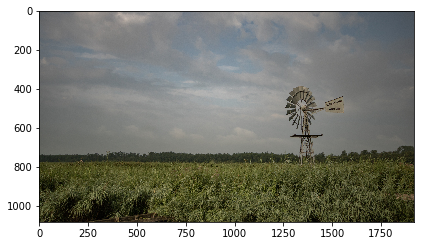

In [40]:
io.imshow(image/255)
plt.show()

In [41]:
vgg_out = vgg19.predict(images)

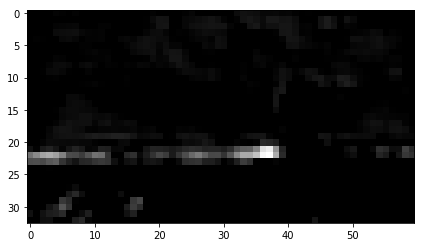

In [49]:
lay_start = 4

out = vgg_out[0,:,:,lay_start]
out = (out - np.amin(out) + 1e-7) / (np.amax(out) - np.amin(out) + 1e-7)

io.imshow(out)
plt.show()

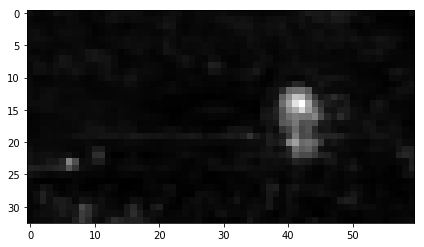

In [47]:
out = vgg_out[0]
out = out.mean(axis=2)

out = (out - np.amin(out) + 1e-7) / (np.amax(out) - np.amin(out) + 1e-7)

io.imshow(out)
plt.show()

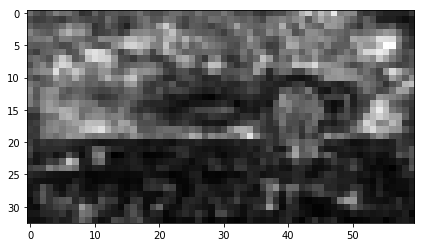

In [46]:
out = vgg_out[0]
out = np.sign(out)
#out = np.greater(out, 4)
out = np.mean(out, axis=2)

out = (out - np.amin(out) + 1e-7) / (np.amax(out) - np.amin(out) + 1e-7)

io.imshow(out)
plt.show()